In [3]:
# Dependence of the power reflectivity on the angle of incidence, if the light at 1064 nm wavelength impinges
# from air on a silica surface. (https://www.rp-photonics.com/brewsters_angle.html)

In [1]:
# Load modules
include("TMMOptics.jl")
include("RIdb.jl")
include("nplot.jl")
using Main.TMMOptics
using Main.RIdb: air, dummy, bk7
using PyPlot

In [2]:
# Define beam
λ = [1064.]
λ0 = 510. # reference wavelength
θi = 0
θf = 90
θ = LinRange(θi, θf, 901)
p = 1. # polatization (s-wave = 0. and p-wave = 1., or any intermediate)
beam = PlaneWave(λ, λ0, θ, p);

In [3]:
# Define type of layers with their indexes of refraction and thicknesses
l0 = Geometrical(dummy(beam.λ, 1., 0.), 0.)
l1 = Geometrical(dummy(beam.λ, 1.5, 0.), 10.)
l2 = Geometrical(dummy(beam.λ, 1.5, 0.), 0.);

In [4]:
# Sequence of materials: elements represent the index position below in the structure (surface down to substrate)
nseq = [l0 l1 l2];

In [5]:
# Perform computation
results = thinfilmoptics(beam, nseq);

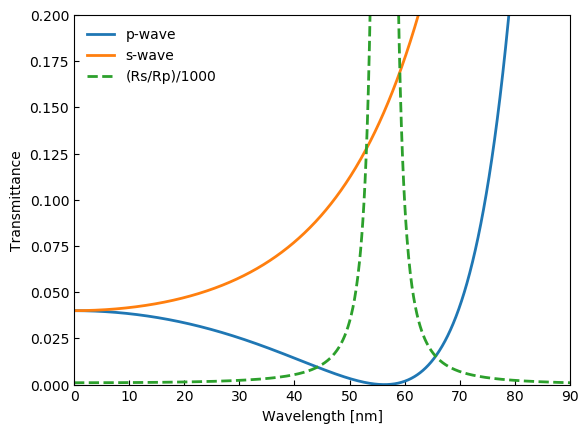

(0.0, 0.2)

In [6]:
# plot the R, T and A spectra
plot(θ, results.Spectra.Rp[1,:], label="p-wave")
plot(θ, results.Spectra.Rs[1,:], label="s-wave")
plot(θ, results.Spectra.Rs[1,:]./results.Spectra.Rp[1,:]./1000, "--", label="(Rs/Rp)/1000")
legend(loc="best")
xlabel("Wavelength [nm]")
ylabel("Transmittance")
ax3 = gca()
xlim(θi, θf)
ylim(0., .2)

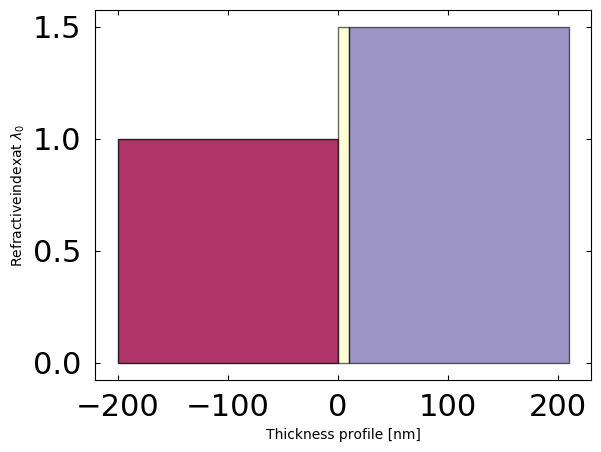

In [8]:
# plot the refractive index profile
nplot(beam.λ, beam.θ, beam.λ0, results.Thickness.d, results.Thickness.ℓ, results.Field.emf, results.Misc.nλ0, nseq)

In [ ]:
# This is an example on how to simulate an interface, by defining a single layer made of the same material
# as the substrate. Therefore, there is no difference for the TMM when matching same materials on different
# layers.